In [2]:
import gzip
import gensim 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Word2Vec Understanding

In [2]:
def read_input(input_file):
    with gzip.open(input_file, 'rb') as f:
        for i, line in enumerate (f): 
            yield gensim.utils.simple_preprocess(line)


documents = list(read_input('reviews_data.txt.gz'))

In [ ]:
model = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2023-03-07 20:41:13,243 : INFO : collecting all words and their counts
2023-03-07 20:41:13,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-07 20:41:13,499 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2023-03-07 20:41:13,744 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2023-03-07 20:41:14,076 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2023-03-07 20:41:14,437 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2023-03-07 20:41:14,803 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2023-03-07 20:41:15,165 : INFO : PROGRESS: at sentence #60000, processed 11013727 words, keeping 76787 word types
2023-03-07 20:41:15,415 : INFO : PROGRESS: at sentence #70000, processed 12637529 words, keeping 83200 word types
2023-03-07 20:41:15,718 : INFO : PROG

2023-03-07 20:41:46,490 : INFO : worker thread finished; awaiting finish of 8 more threads
2023-03-07 20:41:46,493 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-03-07 20:41:46,506 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-03-07 20:41:46,511 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-03-07 20:41:46,526 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-03-07 20:41:46,530 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-03-07 20:41:46,532 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-03-07 20:41:46,538 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-03-07 20:41:46,542 : INFO : worker thread finished; awaiting finish of 0 more threads
2023-03-07 20:41:46,543 : INFO : EPOCH - 1 : training on 41519359 raw words (30350572 effective words) took 24.8s, 1223167 effective words/s
2023-03-07 20:41:47,560 : INFO : EPOCH 2

2023-03-07 20:42:42,917 : INFO : EPOCH 3 - PROGRESS: at 97.62% examples, 1051376 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:42:43,564 : INFO : worker thread finished; awaiting finish of 9 more threads
2023-03-07 20:42:43,567 : INFO : worker thread finished; awaiting finish of 8 more threads
2023-03-07 20:42:43,583 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-03-07 20:42:43,586 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-03-07 20:42:43,587 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-03-07 20:42:43,589 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-03-07 20:42:43,594 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-03-07 20:42:43,596 : INFO : worker thread finished; awaiting finish of 2 more threads
2023-03-07 20:42:43,601 : INFO : worker thread finished; awaiting finish of 1 more threads
2023-03-07 20:42:43,629 : INFO : worker thread finished; awaiting 

2023-03-07 20:43:38,561 : INFO : EPOCH 5 - PROGRESS: at 91.60% examples, 1066059 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:43:39,566 : INFO : EPOCH 5 - PROGRESS: at 95.34% examples, 1066716 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:43:40,572 : INFO : EPOCH 5 - PROGRESS: at 99.00% examples, 1066474 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:43:40,768 : INFO : worker thread finished; awaiting finish of 9 more threads
2023-03-07 20:43:40,778 : INFO : worker thread finished; awaiting finish of 8 more threads
2023-03-07 20:43:40,785 : INFO : worker thread finished; awaiting finish of 7 more threads
2023-03-07 20:43:40,792 : INFO : worker thread finished; awaiting finish of 6 more threads
2023-03-07 20:43:40,800 : INFO : worker thread finished; awaiting finish of 5 more threads
2023-03-07 20:43:40,808 : INFO : worker thread finished; awaiting finish of 4 more threads
2023-03-07 20:43:40,809 : INFO : worker thread finished; awaiting finish of 3 more threads
2023-03-07 20:43:4

2023-03-07 20:44:22,903 : INFO : EPOCH 2 - PROGRESS: at 48.61% examples, 1078876 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:44:23,913 : INFO : EPOCH 2 - PROGRESS: at 52.11% examples, 1073859 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:44:24,916 : INFO : EPOCH 2 - PROGRESS: at 55.75% examples, 1073677 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:44:25,918 : INFO : EPOCH 2 - PROGRESS: at 59.59% examples, 1075855 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:44:26,927 : INFO : EPOCH 2 - PROGRESS: at 63.41% examples, 1076243 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:44:27,938 : INFO : EPOCH 2 - PROGRESS: at 67.16% examples, 1076096 words/s, in_qsize 17, out_qsize 2
2023-03-07 20:44:28,951 : INFO : EPOCH 2 - PROGRESS: at 70.74% examples, 1076293 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:44:29,964 : INFO : EPOCH 2 - PROGRESS: at 74.47% examples, 1075865 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:44:30,976 : INFO : EPOCH 2 - PROGRESS: at 77.92% examples, 1076454

2023-03-07 20:45:17,020 : INFO : EPOCH 4 - PROGRESS: at 35.62% examples, 1044410 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:45:18,028 : INFO : EPOCH 4 - PROGRESS: at 39.28% examples, 1041895 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:45:19,032 : INFO : EPOCH 4 - PROGRESS: at 42.90% examples, 1039551 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:45:20,046 : INFO : EPOCH 4 - PROGRESS: at 46.68% examples, 1038921 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:45:21,059 : INFO : EPOCH 4 - PROGRESS: at 50.25% examples, 1037049 words/s, in_qsize 20, out_qsize 1
2023-03-07 20:45:22,061 : INFO : EPOCH 4 - PROGRESS: at 53.56% examples, 1035873 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:45:23,063 : INFO : EPOCH 4 - PROGRESS: at 57.21% examples, 1034851 words/s, in_qsize 16, out_qsize 3
2023-03-07 20:45:24,075 : INFO : EPOCH 4 - PROGRESS: at 60.72% examples, 1033855 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:45:25,079 : INFO : EPOCH 4 - PROGRESS: at 64.51% examples, 1033905

2023-03-07 20:46:12,858 : INFO : EPOCH 6 - PROGRESS: at 17.71% examples, 981341 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:13,876 : INFO : EPOCH 6 - PROGRESS: at 20.35% examples, 981126 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:14,879 : INFO : EPOCH 6 - PROGRESS: at 23.41% examples, 992680 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:15,879 : INFO : EPOCH 6 - PROGRESS: at 26.70% examples, 995894 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:16,891 : INFO : EPOCH 6 - PROGRESS: at 30.56% examples, 1002636 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:46:17,893 : INFO : EPOCH 6 - PROGRESS: at 33.91% examples, 997877 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:18,908 : INFO : EPOCH 6 - PROGRESS: at 36.93% examples, 985123 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:19,910 : INFO : EPOCH 6 - PROGRESS: at 40.30% examples, 981787 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:46:20,920 : INFO : EPOCH 6 - PROGRESS: at 43.71% examples, 978062 words/s

2023-03-07 20:47:08,144 : INFO : EPOCH 8 - PROGRESS: at 9.90% examples, 1046600 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:09,148 : INFO : EPOCH 8 - PROGRESS: at 12.79% examples, 1051672 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:10,163 : INFO : EPOCH 8 - PROGRESS: at 16.05% examples, 1058899 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:11,172 : INFO : EPOCH 8 - PROGRESS: at 19.00% examples, 1062779 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:12,174 : INFO : EPOCH 8 - PROGRESS: at 22.10% examples, 1066083 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:13,180 : INFO : EPOCH 8 - PROGRESS: at 24.87% examples, 1062473 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:14,182 : INFO : EPOCH 8 - PROGRESS: at 28.96% examples, 1066878 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:15,195 : INFO : EPOCH 8 - PROGRESS: at 32.94% examples, 1069187 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:47:16,201 : INFO : EPOCH 8 - PROGRESS: at 36.64% examples, 1069170 

2023-03-07 20:48:03,222 : INFO : EPOCH 10 - PROGRESS: at 3.27% examples, 1007108 words/s, in_qsize 17, out_qsize 2
2023-03-07 20:48:04,230 : INFO : EPOCH 10 - PROGRESS: at 6.92% examples, 1054353 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:48:05,233 : INFO : EPOCH 10 - PROGRESS: at 10.07% examples, 1060859 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:48:06,237 : INFO : EPOCH 10 - PROGRESS: at 12.97% examples, 1062399 words/s, in_qsize 20, out_qsize 0
2023-03-07 20:48:07,240 : INFO : EPOCH 10 - PROGRESS: at 16.16% examples, 1066859 words/s, in_qsize 18, out_qsize 1
2023-03-07 20:48:08,250 : INFO : EPOCH 10 - PROGRESS: at 19.04% examples, 1065980 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:48:09,254 : INFO : EPOCH 10 - PROGRESS: at 22.13% examples, 1067334 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:48:10,263 : INFO : EPOCH 10 - PROGRESS: at 25.10% examples, 1069423 words/s, in_qsize 19, out_qsize 0
2023-03-07 20:48:11,268 : INFO : EPOCH 10 - PROGRESS: at 29.09% examples, 

(303484134, 415193590)

##### Determine Similar Words

In [ ]:
w1 = "dirty"
model.wv.most_similar(positive=w1)

[('filthy', 0.8662021160125732),
 ('stained', 0.7803919315338135),
 ('unclean', 0.7735113501548767),
 ('dusty', 0.7707752585411072),
 ('grubby', 0.755465567111969),
 ('smelly', 0.754362165927887),
 ('mouldy', 0.7182784080505371),
 ('soiled', 0.7163498401641846),
 ('disgusting', 0.7112285494804382),
 ('gross', 0.7097774744033813)]

In [ ]:
w1 = ["polite"]
model.wv.most_similar(positive=w1,topn=6)

[('courteous', 0.9187648296356201),
 ('friendly', 0.8420291543006897),
 ('cordial', 0.8034182786941528),
 ('professional', 0.7910556197166443),
 ('attentive', 0.7811822891235352),
 ('personable', 0.7602941393852234)]

In [ ]:
w1 = ["france"]
model.wv.most_similar(positive=w1,topn=6)

[('canada', 0.6857007741928101),
 ('spain', 0.6674055457115173),
 ('germany', 0.6383941173553467),
 ('greece', 0.6188459396362305),
 ('england', 0.5949788093566895),
 ('mexico', 0.5882871150970459)]

In [ ]:
w1 = ["shocked"]
model.wv.most_similar(positive=w1,topn=6)

[('horrified', 0.8122370839118958),
 ('amazed', 0.8022541403770447),
 ('stunned', 0.7757717967033386),
 ('astonished', 0.7615650296211243),
 ('appalled', 0.7527512311935425),
 ('dismayed', 0.7368218898773193)]

In [ ]:
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar(positive=w1,negative=w2,topn=10)

[('duvet', 0.7138960361480713),
 ('mattress', 0.6941751837730408),
 ('quilt', 0.6922807693481445),
 ('blanket', 0.6922429800033569),
 ('matress', 0.6790806651115417),
 ('pillowcase', 0.6540178656578064),
 ('pillows', 0.6411897540092468),
 ('sheets', 0.6325255632400513),
 ('foam', 0.6090880632400513),
 ('comforter', 0.6004157066345215)]

In [ ]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.75436217

In [ ]:
# similarity between two identical words
model.wv.similarity(w1="dirty",w2="dirty")

1.0

In [ ]:
# similarity between two unrelated words
model.wv.similarity(w1="dirty",w2="clean")

0.2693956

In [ ]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])

'france'

In [ ]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["bed","pillow","duvet","shower"])

'shower'

### IMDB Dataset

In [3]:
df_imdb = pd.read_csv("/content/gdrive/My Drive/IMDB Dataset.csv")

In [ ]:
df_imdb.head(2)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [ ]:
pd.set_option('display.max_colwidth',500)
df_imdb['review'].head(5)

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is calle...
1    A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrifi

#### We don't need to much preprocessing on the text such as stemming or lemitization because word2vec is more about context around the words. So, replacing the words with their root lemmas would be unnecessay for example Running and run can be in different tenses, finding out similar words depends on the tense of the senteces. 

#### So, here we could just lower the cases and remove " breaks " words from the text

In [4]:
def tokenize(text):
    text = text.replace('<br />', '')
    tokens = gensim.utils.simple_preprocess(text)
    return pd.Series([tokens, ' '.join(tokens)])

In [5]:
df_imdb[['text_tokens', 'tokenized_text']] = df_imdb['review'].apply(tokenize)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_imdb[['text_tokens','review','tokenized_text']], df_imdb['sentiment'], test_size=0.2, random_state=42)

In [ ]:
wordvec_model = gensim.models.Word2Vec(X_train['text_tokens'], sg=1, vector_size=100, min_count=5, window=5, workers=4)

In [ ]:
X_train_vec = []
for review in tqdm(X_train['text_tokens']) :
    review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
    X_train_vec.append(np.mean(review_vectors, axis=0))
    

X_test_vec = []
for review in tqdm(X_test['text_tokens']):
    review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
    if len(review_vectors) > 0:
        X_test_vec.append(np.mean(review_vectors, axis=0))
    else:
        X_test_vec.append(np.zeros(wordvec_model.vector_size))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:23<00:00, 69.59it/s]


In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
train_pred = lr_model.predict(X_train_vec)
test_pred = lr_model.predict(X_test_vec)

In [ ]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [ ]:
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Train accuracy: 0.8689
Test accuracy: 0.8684


In [ ]:
size_list = [25, 50, 100, 150]
train_acc_list = []
test_acc_list = []

for size in size_list:
    print("size_running: {}".format(size))
    wordvec_model = gensim.models.Word2Vec(X_train['text_tokens'], sg=1, vector_size=size, min_count=5, window=5, workers=4)
    X_train_vec = []

    for review in tqdm(X_train['text_tokens']) :
        review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
        X_train_vec.append(np.mean(review_vectors, axis=0))


    X_test_vec = []
    for review in tqdm(X_test['text_tokens']):
        review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
        if len(review_vectors) > 0:
            X_test_vec.append(np.mean(review_vectors, axis=0))
        else:
            X_test_vec.append(np.zeros(wordvec_model.vector_size))
    
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_vec, y_train)
    
    train_pred = lr_model.predict(X_train_vec)
    test_pred = lr_model.predict(X_test_vec)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

size_running: 25


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:27<00:00, 67.79it/s]


size_running: 50


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:30<00:00, 66.47it/s]


size_running: 100


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:16<00:00, 73.23it/s]


size_running: 150


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:25<00:00, 68.61it/s]


In [ ]:
train_acc_list

[0.82935, 0.854175, 0.867875, 0.87455]

In [ ]:
test_acc_list

[0.8296, 0.8577, 0.8644, 0.8738]

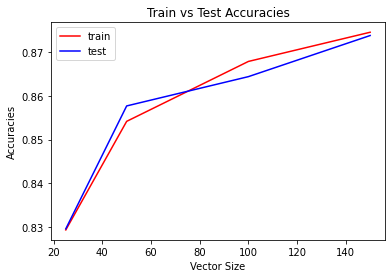

In [ ]:
plt.plot(size_list,train_acc_list, color='r',label='train')

plt.plot(size_list,test_acc_list, color='b',label='test')

plt.xlabel('Vector Size')
plt.ylabel('Accuracies')
plt.title('Train vs Test Accuracies')

plt.legend()
plt.show()

In [ ]:
test_acc_list

[0.8296, 0.8577, 0.8644, 0.8738]

In [ ]:
window_list = [2, 3, 5, 10]
wind_train_acc_list = []
wind_test_acc_list = []

for window in window_list:
    print("window_size_running: {}".format(window))
    wordvec_model = gensim.models.Word2Vec(X_train['text_tokens'], sg=1, vector_size=100, min_count=5, window=window, workers=4)
    X_train_vec = []

    for review in tqdm(X_train['text_tokens']) :
        review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
        X_train_vec.append(np.mean(review_vectors, axis=0))


    X_test_vec = []
    for review in tqdm(X_test['text_tokens']):
        review_vectors = [wordvec_model.wv[word] for word in review if word in wordvec_model.wv.index_to_key]
        if len(review_vectors) > 0:
            X_test_vec.append(np.mean(review_vectors, axis=0))
        else:
            X_test_vec.append(np.zeros(wordvec_model.vector_size))
    
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_vec, y_train)
    
    train_pred = lr_model.predict(X_train_vec)
    test_pred = lr_model.predict(X_test_vec)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    wind_train_acc_list.append(train_acc)
    wind_test_acc_list.append(test_acc)

window_size_running: 2


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:25<00:00, 68.49it/s]


window_size_running: 3


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:42<00:00, 61.57it/s]


window_size_running: 5


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:18<00:00, 72.10it/s]


window_size_running: 10


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:12<00:00, 75.22it/s]


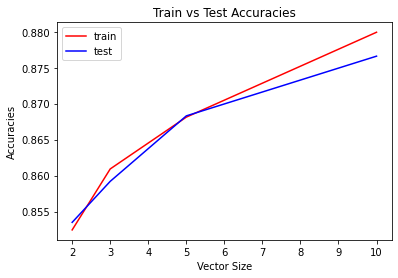

In [ ]:
plt.plot(window_list,wind_train_acc_list, color='r',label='train')

plt.plot(window_list,wind_test_acc_list, color='b',label='test')

plt.xlabel('Vector Size')
plt.ylabel('Accuracies')
plt.title('Train vs Test Accuracies')

plt.legend()
plt.show()

### Why would you want to use an RNN for sentiment analysis or text classification tasks instead of models that aren’t neural networks e.g. logistic regression?

RNN can be useful for sentiment analysis or text classification tasks because it can take into account the sequential nature of language. In contrast, models like logistic regression treat each word as an independent feature and do not consider the context or order of the words. An RNN can analyze the context of each word in the context of the words that came before it, which can lead to better performance on tasks that require understanding of language and its meaning.

In [3]:
#df_imdb = pd.read_csv("/content/gdrive/My Drive/IMDB Dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(df_imdb[['review']], df_imdb['sentiment'], test_size=0.2, random_state=42,stratify=df_imdb['sentiment'])

In [5]:
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(X_train['review'])
X_train_tok = tokenizer.texts_to_sequences(X_train['review'])
X_test_tok = tokenizer.texts_to_sequences(X_test['review'])


max_length = max(len(s) for s in X_test_tok)
X_train_seq = pad_sequences(X_train_tok, padding='post', maxlen=max_length)
X_test_seq = pad_sequences(X_test_tok, padding='post', maxlen=max_length)

In [11]:
vocab_size = len(tokenizer.word_index) + 1 

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=2,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train_seq,y_train_enc, epochs=10, validation_data=(X_test_seq,y_test_enc))

Epoch 1/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.2289 - accuracy: 0.9138 - val_loss: 0.2847 - val_accuracy: 0.8859
Epoch 2/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.1858 - accuracy: 0.9312 - val_loss: 0.2940 - val_accuracy: 0.8880
Epoch 3/10
1250/1250 [==============================] - 74s 59ms/step - loss: 0.1586 - accuracy: 0.9445 - val_loss: 0.2771 - val_accuracy: 0.8875
Epoch 4/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.1422 - accuracy: 0.9516 - val_loss: 0.2633 - val_accuracy: 0.8942
Epoch 5/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.1229 - accuracy: 0.9602 - val_loss: 0.2666 - val_accuracy: 0.8950
Epoch 6/10
1250/1250 [==============================] - 78s 62ms/step - loss: 0.1032 - accuracy: 0.9675 - val_loss: 0.2708 - val_accuracy: 0.8974
Epoch 7/10
1250/1250 [==============================] - 77s 61ms/step - loss: 0.0859 - accuracy: 0.9734 - val_loss: 0.3364 -

In [21]:
test_loss, test_acc = model.evaluate(X_test_seq,y_test_enc)
print('RNN Test Accuracy:', test_acc)

313/313 [==============================] - 9s 28ms/step - loss: 0.3414 - accuracy: 0.8920
RNN Test Accuracy: 0.8920000195503235


In [20]:
word_vectors_gg = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/GoogleNews-vectors-negative300.bin.gz',binary=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_imdb[['text_tokens']], df_imdb['sentiment'], test_size=0.2, random_state=42,stratify=df_imdb['sentiment'])

In [24]:
X_train_vec = []
for review in tqdm(X_train['text_tokens']) :
    review_vectors = [word_vectors_gg[word] for word in review if word in word_vectors_gg.wv.vocab]
    if len(review_vectors) > 0:
        X_train_vec.append(np.mean(review_vectors, axis=0))
    else:
        X_train_vec.append(np.zeros(word_vectors_gg.vector_size))
    

X_test_vec = []
for review in tqdm(X_test['text_tokens']):
    review_vectors = [word_vectors_gg[word] for word in review if word in word_vectors_gg.wv.vocab]
    if len(review_vectors) > 0:
        X_test_vec.append(np.mean(review_vectors, axis=0))
    else:
        X_test_vec.append(np.zeros(word_vectors_gg.vector_size))

  0%|          | 0/40000 [00:00<?, ?it/s]<ipython-input-24-af33ec6dcd53>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  review_vectors = [word_vectors_gg[word] for word in review if word in word_vectors_gg.wv.vocab]
  0%|          | 0/10000 [00:00<?, ?it/s]<ipython-input-24-af33ec6dcd53>:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  review_vectors = [word_vectors_gg[word] for word in review if word in word_vectors_gg.wv.vocab]
100%|██████████| 10000/10000 [00:10<00:00, 923.28it/s]


In [25]:
model_wc = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=301,
        output_dim=2,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [28]:
model_wc.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model_wc.fit(np.stack(X_train_vec),y_train_enc, epochs=10, validation_data=(np.stack(X_test_vec),y_test_enc))

Epoch 1/10
1250/1250 [==============================] - 76s 51ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 -

In [29]:
test_loss, test_acc = model_wc.evaluate(np.stack(X_test_vec),y_test_enc)
print('RNN Test Accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.6932 - accuracy: 0.5000
RNN Test Accuracy: 0.5


### Question-4

In [7]:
wordvec_model = gensim.models.Word2Vec(df_imdb['text_tokens'], sg=1, vector_size=100, min_count=5, window=5, workers=4)

In [11]:
interesting_wc = wordvec_model.wv.most_similar('interesting', topn=20)
boring_wc = wordvec_model.wv.most_similar('boring', topn=2)

print("Trained Word2Vec , top 20 most similar words to 'interesting':")
print(interesting_wc)

print("Trained Word2Vec, top 20 most similar words to 'boring':")
print(boring_wc)

Trained Word2Vec , top 20 most similar words to 'interesting':
[('intriguing', 0.8363513946533203), ('fascinating', 0.7766485810279846), ('exciting', 0.7530415058135986), ('substantive', 0.7464281320571899), ('engaging', 0.7418602108955383), ('entertaining', 0.738772988319397), ('important', 0.7222437858581543), ('enjoyable', 0.7160022258758545), ('enticing', 0.7084144949913025), ('worthwhile', 0.700660765171051), ('plausible', 0.6970651745796204), ('unusual', 0.6969402432441711), ('disconcerting', 0.6968598365783691), ('compelling', 0.6868720054626465), ('engrossing', 0.6784526109695435), ('effective', 0.6762152910232544), ('satisfactory', 0.675615668296814), ('followable', 0.6642134785652161), ('smoother', 0.6610172390937805), ('informative', 0.658810555934906)]
Trained Word2Vec, top 20 most similar words to 'boring':
[('dull', 0.8937370777130127), ('tedious', 0.8606827855110168)]


In [2]:
word_vectors_gg = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/GoogleNews-vectors-negative300.bin.gz',binary=True)

In [ ]:
interesting_gg = word_vectors_gg.most_similar('interesting', topn=20)
boring_gg = word_vectors_gg.most_similar('boring', topn=20)
print("Pre-trained Word2Vec, top 20 most similar words to 'interesting':")
print(interesting_gg)
print("Pre-trained Word2Vec, top 20 most similar words to 'boring':")
print(boring_gg)

In [9]:
pca = PCA(n_components=0.75) 
embeddings_pca_wc = pca.fit_transform(wordvec_model.wv.vectors)

In [13]:
print("The number of components need to explain the 75% variance in the trained-model is {}".format(len(embeddings_pca_wc[0])))

The number of components need to explain the 75% variance is 40


In [16]:
pca = PCA(n_components=0.75) 
embeddings_pca_gg = pca.fit_transform(word_vectors_gg.vectors)

In [18]:
word_keywords = ["interesting", "boring"] + [i[0] for i in interesting_wc] +  [i[0] for i in boring_wc] 
word_keywords_vectors = [wordvec_model.wv[word] for word in word_keywords]

pca_key_words = pca.fit_transform(word_keywords_vectors)

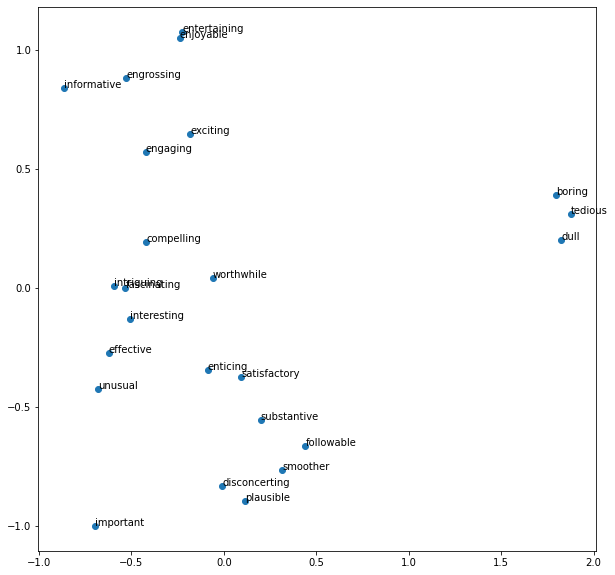

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(pca_key_words[:, 0], pca_key_words[:, 1])

for i, word in enumerate(word_keywords):
    ax.annotate(word, (pca_key_words[i, 0], pca_key_words[i, 1]))
    
plt.show()